# CSCI 4155 Machine Learning - Group Project

---
Group 13:
- [Corentin Goetghebeur](cr453043@dal.ca) - B00945496
- [Gabriel Marchand](gb614643@dal.ca) - B00929349
- [Rinchen Toh](rn835427@dal.ca) - B00944448
---

This notebook is part of a group project taking place during the fall semester of 2022 in the CSCI 4155 Machine Learning class in Dalhousie University (NS, Canada).

This project aims to compare different machine learning algorithms to detect network intrusions using the KDD Cup'99 dataset.

---

This notbook contains analysis of the dataset, data visualization and preprocessing.

In [25]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Dataset

For this project, we will use the KDD99 dataset, a network traffic dataset widely used for academic and research purposes.

This dataset has 494021 rows and 42 columns. The 42 features can be split in 3 categories:

- Basic features of network connection
- Content features suggested by domain knowledge
- Traffic features computed over a 2 seconds window.

**Basic features: (9 features)**

| Feature | Type | Info |
| --- | --- | --- |
| duration | numerical | length (in seconds) of the connections|
| protocol_type | categorical | type of the protocol used (tcp, udp) |
| service | categorical | network service on the destination (http, telnet, ...)|
| src_bytes | numerical | number of data bytes from source to destination |
| dst_bytes | numerical | number of data bytes from destination to source |
| flag | categorical | normal or error status of the connection |
| land | categorical | 1 if connection is from / to the same host or port, 0 otherwise |
| wrong_fragment | numerical | number of "wrong" fragments|
| urgent | numerical | number of urgent packets |


**Content features: (12 features)**

| Feature | Type | Info |
| --- | --- | --- |
| hot | numerical | Number of "hot" indicators |
| num_failed_login | numerical | number of failed login attempts |
| logged_in | categorical | 1 if successfully logged in, 0 otherwise |
| num_compromised | numerical | number of "compromised" conditions |
| root_shell | categorical | 1 if root shell is obtained, 0 otherwise |
| su_attempted | categorical | 1 if "su root" attempted, 0 otherwise |
| num_root | numerical | number of 'root' accesses |
| num_file_creations | numerical | number of file creation operations |
| num_shell | numerical | number of shell prompts |
| num_outbound_cmds | numerical | number of outbound commands in an ftp session |
| is_hot_login | categorical | 1 if the login belongs to the 'hot' list, 0 otherwise |
| is_guest_login |categorical | 1 if he login is a 'guest' login, 0 otherwise|



**Traffic features: (20 features)**

These values are computed over a 2 second window.

| Feature | Type | Info |
| --- | --- | --- |
| count | numerical | number of connections to the same host as the current connection in the past 2 seconds |
| - | - | *(following are for same host connections)* |
| serror_rate | numerical | % of connections that have "SYN" errors |
| rerror_rate | numerical | % of connections that have "REJ" errors |
| same_srv_rate | numerical | % of connections to the same service |
| diff_srv_rate | numerical | % of connections to a different service |
| srv_count | numerical | number of connections to the same service |
| - | - | *(the following are for same service connection)* |
| srv_serror_rate | numerical | % of connections that have "SYN" errors |
| srv_serror_rate | numerical | % of connections that have "REJ" errors |
| srv_diff_host_rate | numerical | % of connections to a different host |
| dst_host_count | numerical | number of connections to the same destination host|
| dst_host_srv_count | numerical | number of connections to the same service / port number |
| dst_host_same_srv_rate | numerical | % of connections to the same service |
| dst_host_diff_srv_rate | numerical | % of connections to a different service |
| dst_host_same_src_port_rate | numerical | % of connections to the same service/port number |
| dst_host_diff_src_port_rate | numerical | % of connections to a different service/port number |
| dst_host_serror_rate| numerical | % of connections with "SYN" error (same host) |
| dst_host_rerror_rate | numerical | % of connections with "REJ" error (same host) |
| dst_host_srv_serror_rate | numerical | % of connections to with "SYN" error among (same service) |
| dst_host_srv_rerror_rate | numerical | % of connections to with "REJ" error among (same service) |


**Label:**
The label column (categorical) contains either 'normal' or the name of the attack.

In [26]:
# loading dataset
# from google.colab import drive
# drive.mount('/content/gdrive')
df = pd.read_csv("kddcup99_csv.csv")

## Cleaning Dataset

TODO:
- fixing typos in the column names
- grouping in the label column
- 

In [27]:
# dataset info
print(f"Dataset information:\n{df.info()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494020 entries, 0 to 494019
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494020 non-null  int64  
 1   protocol_type                494020 non-null  object 
 2   service                      494020 non-null  object 
 3   flag                         494020 non-null  object 
 4   src_bytes                    494020 non-null  int64  
 5   dst_bytes                    494020 non-null  int64  
 6   land                         494020 non-null  int64  
 7   wrong_fragment               494020 non-null  int64  
 8   urgent                       494020 non-null  int64  
 9   hot                          494020 non-null  int64  
 10  num_failed_logins            494020 non-null  int64  
 11  logged_in                    494020 non-null  int64  
 12  lnum_compromised             494020 non-null  int64  
 13 

The dataset does not have any null values.

### Grouping Labels

For this project, we will only predict main categories of attacks:
- DOS: denial of service (syn flood)
- R2L: Remote to Local - unauthorized access from a remote machine (guessing password)
- U2R: User to Root - unauthorized access to superuser privileges (buffer overflows)
- Probbing: surveillance, port scanning

There are originally 22 attack types (+ normal), we need to group those into the 4 categories. This grouping of attacks is presented in the initial publication of the dataset.


In [28]:
# Different attacl types
print(f"Original attack types:\n{df['label'].value_counts()}")

Original attack types:
smurf              280790
neptune            107201
normal              97277
back                 2203
satan                1589
ipsweep              1247
portsweep            1040
warezclient          1020
teardrop              979
pod                   264
nmap                  231
guess_passwd           53
buffer_overflow        30
land                   21
warezmaster            20
imap                   12
rootkit                10
loadmodule              9
ftp_write               8
multihop                7
phf                     4
perl                    3
spy                     2
Name: label, dtype: int64


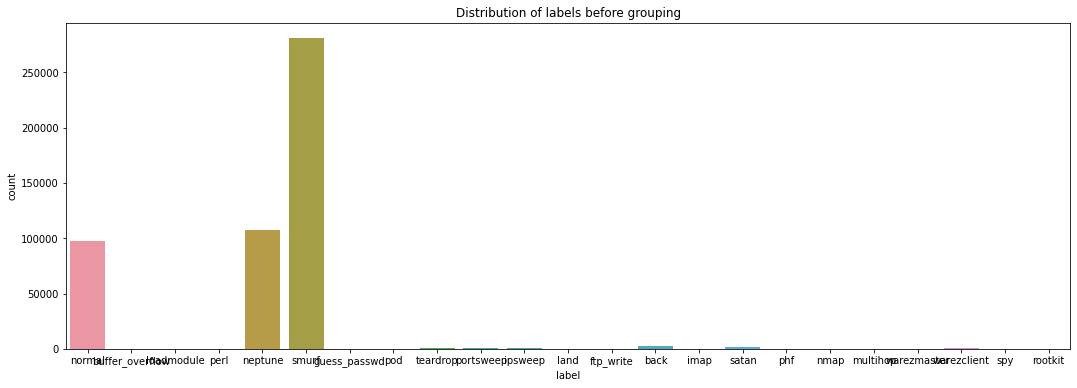

In [29]:
# visualization of labels before grouping

plt.figure(figsize=(18, 6))
plt.title("Distribution of labels before grouping")
sns.countplot(data=df, x='label')
plt.show()

In [30]:
# Grouping labels
attacks = {
  'back': 'dos',
  'buffer_overflow': 'u2r',
  'ftp_write': 'r2l',
  'guess_passwd': 'r2l',
  'imap': 'r2l',
  'ipsweep': 'probe',
  'land': 'dos',
  'loadmodule': 'u2r',
  'multihop': 'r2l',
  'neptune': 'dos',
  'nmap': 'probe',
  'perl': 'u2r',
  'phf': 'r2l',
  'pod': 'dos',
  'portsweep': 'probe',
  'rootkit': 'u2r',
  'satan': 'probe',
  'smurf': 'dos',
  'spy': 'r2l',
  'teardrop': 'dos',
  'warezclient': 'r2l',
  'warezmaster': 'r2l'
}

df['label'].replace(attacks, inplace=True)
print(f"Grouped attack types:\n{df['label'].value_counts()}")

Grouped attack types:
dos       391458
normal     97277
probe       4107
r2l         1126
u2r           52
Name: label, dtype: int64


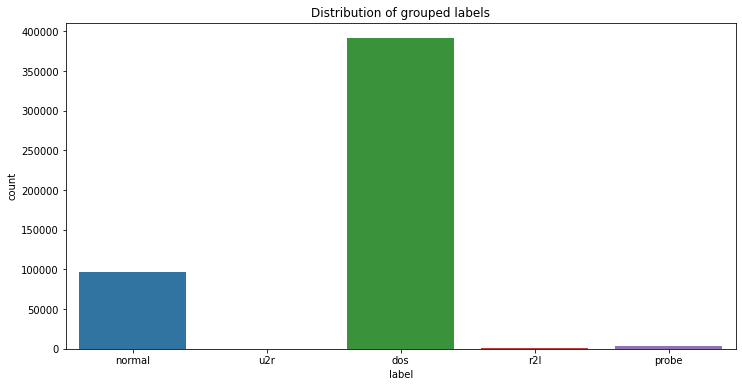

In [31]:
# visualization of labels after grouping

plt.figure(figsize=(12, 6))
plt.title("Distribution of grouped labels")
sns.countplot(data=df, x='label')
plt.show()

From the plot, we can see that the labels do not have the same amount of rows. This is due to the nature of each attack.

The DOS attack has the majority of rows, even more than the 'normal' behaviour. This makes sense because the denial of service attacks work by flooding the network with requests to prevent regular traffic.

Then comes the normal behaviour, this one has a lot more rows than the attacks (except the DOS attack) because most people do not try to attack the network.

The R2L and U2R attacks have very few rows because they can usually be achieved with a single connection.

### Categorical features

In [32]:
categorical_cols = [col for col in df.columns if df[col].dtype == 'object']
print(f"Categorical features: {categorical_cols}")

# note that label is not a feature in this case, it is our class (i.e. output) 
# which we want to be categorical hence we did not map it into numerical variable

Categorical features: ['protocol_type', 'service', 'flag', 'label']


We need to map those features to have only numerical values.

In [33]:
# replacing protocol_type
df['protocol_type'].unique()

array(['tcp', 'udp', 'icmp'], dtype=object)

In [34]:
protocol_types_dict = {
    'tcp': 0,
    'udp': 1,
    'icmp': 2
}

df['protocol_type'].replace(protocol_types_dict, inplace=True)

print(f"Mapped protocol types:{df['protocol_type'].unique()}")

Mapped protocol types:[0 1 2]


For the *flag* feature:

In [35]:
print(f"Possible values for flag:\n{df['flag'].unique()}")

Possible values for flag:
['SF' 'S1' 'REJ' 'S2' 'S0' 'S3' 'RSTO' 'RSTR' 'RSTOS0' 'OTH' 'SH']


In [36]:
flag_map = {
    'SF': 0, 'S1': 1, 'REJ': 2,
    'S2': 3, 'S0': 4, 'S3': 5,
    'RSTO': 6, 'RSTR': 7,  'RSTOS0': 8, 
    'OTH': 9, 'SH': 10
}

df['flag'].replace(flag_map, inplace=True)

print(f"Mapped flags:\n{df['flag'].unique()}")

Mapped flags:
[ 0  1  2  3  4  5  6  7  8  9 10]


Now for service:

In [37]:
print(f"Possible values for service:\n{df['service'].unique()}")

Possible values for service:
['http' 'smtp' 'finger' 'domain_u' 'auth' 'telnet' 'ftp' 'eco_i' 'ntp_u'
 'ecr_i' 'other' 'private' 'pop_3' 'ftp_data' 'rje' 'time' 'mtp' 'link'
 'remote_job' 'gopher' 'ssh' 'name' 'whois' 'domain' 'login' 'imap4'
 'daytime' 'ctf' 'nntp' 'shell' 'IRC' 'nnsp' 'http_443' 'exec' 'printer'
 'efs' 'courier' 'uucp' 'klogin' 'kshell' 'echo' 'discard' 'systat'
 'supdup' 'iso_tsap' 'hostnames' 'csnet_ns' 'pop_2' 'sunrpc' 'uucp_path'
 'netbios_ns' 'netbios_ssn' 'netbios_dgm' 'sql_net' 'vmnet' 'bgp' 'Z39_50'
 'ldap' 'netstat' 'urh_i' 'X11' 'urp_i' 'pm_dump' 'tftp_u' 'tim_i' 'red_i']


In [38]:
service_map = {}
for i, service in enumerate(df['service'].unique()):
  service_map[service] = i

df['service'].replace(service_map, inplace=True)

print(f"Mapped values for service:\n{df['service'].unique()}")

Mapped values for service:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65]


### Correlation

We look at all the columns correlation in order to remove the columns with the most correlated ones

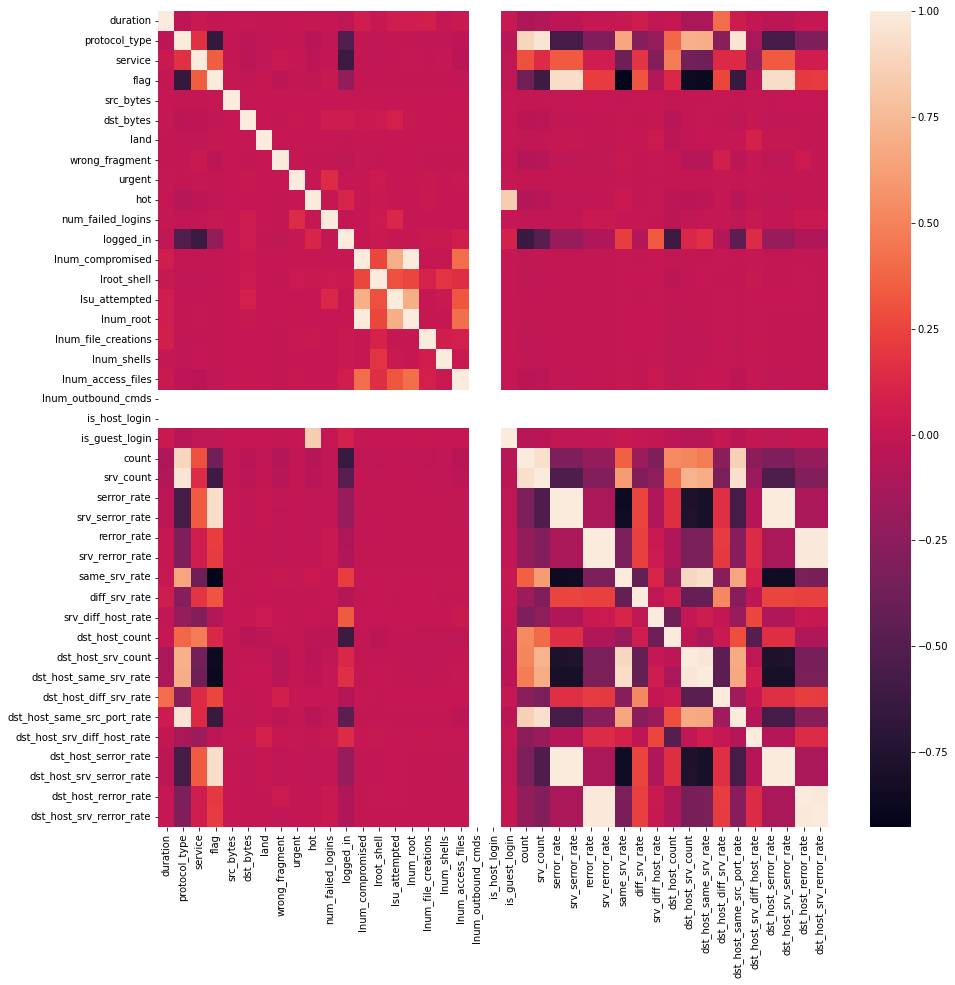

In [39]:
fig, ax = plt.subplots(figsize=(15,15))       
sns.heatmap(df.corr(), ax=ax)

In [40]:
# The column rerror_rate is very correlated to dst_host_srv_serror_rate, dst_host_serror_rate.

#dst_host_serror_rate, dst_host_rerror_rate, dst_host_srv_count and same_srv_rate are all correlated. 
# We can remove all but one
df.drop('dst_host_serror_rate',axis = 1, inplace=True)
df.drop('dst_host_srv_serror_rate',axis = 1, inplace=True)

# The column srv_rerror_rate is very correlated to dst_host_srv_rerror_rate, dst_host_srv_serror_rate.
df.drop('dst_host_srv_rerror_rate',axis = 1, inplace=True)
df.drop('dst_host_rerror_rate',axis = 1, inplace=True)

# The columns lnum_compromised and lnum_root count, dst_host_rerror_rate and dst_host_srv_rerror_rate,
# dst_host_serror_rate and dst_host_srv_serror_rate, rerror_rate and srv_rerror_rate, serror_rate and srv_serror_rate,
# count and dst_host_same_src_port_rate, dst_host_srv_count and dst_host_same_srv_count,  are very correlated
df.drop('lnum_root',axis = 1, inplace=True)
df.drop('srv_count',axis = 1, inplace=True)
df.drop('srv_rerror_rate',axis = 1, inplace=True)
df.drop('srv_serror_rate',axis = 1, inplace=True)
df.drop('dst_host_same_srv_rate',axis = 1, inplace=True)
df.drop('dst_host_same_src_port_rate',axis = 1, inplace=True)

### Train-test split

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop("label", axis=1),
                                                    df["label"],
                                                    test_size=0.25,
                                                    random_state=101)

print(f"Shape of training dataset: {X_train.shape}")
print(f"Shape of testing dataset: {X_test.shape}")

Shape of training dataset: (370515, 31)
Shape of testing dataset: (123505, 31)


Since some of the attack type have very few rows, we will check the proportions of labels in each dataset.

In [42]:
# checking label proportions
print(f"Labels in the training data: \n{y_train.value_counts() / y_train.shape[0]}\n")
print(f"Labels in the testing data: \n{y_test.value_counts() / y_test.shape[0]}")

Labels in the training data: 
dos       0.792902
normal    0.196470
probe     0.008234
r2l       0.002286
u2r       0.000108
Name: label, dtype: float64

Labels in the testing data: 
dos       0.790867
normal    0.198227
probe     0.008550
r2l       0.002259
u2r       0.000097
Name: label, dtype: float64


We have the same proportions of each label in both datasets, we can now save them to use in the classification notebooks.

Since we will use different classification algorithms, the scaling is not included in this preprocessing notebook, to use an appropriate scaling algorithm for each classification.

### Sampled versions

Since the dataset has a lot of rows, we can use a sampled version to reduce training time in some of the algorithms.

In [43]:
sampled_df = df.sample(n=100_000)
X_train_sampled, X_test_sampled, y_train_sampled, y_test_sampled = train_test_split(sampled_df.drop("label", axis=1),
                                                                                    sampled_df["label"],
                                                                                    test_size=0.25,
                                                                                    random_state=101)

Testing proportions of labels:

In [44]:
print(f"Label support in the sampled dataset: \n{sampled_df['label'].value_counts() / sampled_df.shape[0]}")
print(f"Label support in the sampled dataset: \n{y_train_sampled.value_counts() / y_train_sampled.shape[0]}")
print(f"Label support in the sampled dataset: \n{y_test_sampled.value_counts() / y_test_sampled.shape[0]}")

Label support in the sampled dataset: 
dos       0.79181
normal    0.19721
probe     0.00855
r2l       0.00234
u2r       0.00009
Name: label, dtype: float64
Label support in the sampled dataset: 
dos       0.792227
normal    0.196827
probe     0.008533
r2l       0.002333
u2r       0.000080
Name: label, dtype: float64
Label support in the sampled dataset: 
dos       0.79056
normal    0.19836
probe     0.00860
r2l       0.00236
u2r       0.00012
Name: label, dtype: float64


### Exporting datasets

In [45]:
# saving datasets
X_train.to_csv("kdd99_training_data.csv")
X_test.to_csv("kdd99_testing_data.csv")
y_train.to_csv("kdd99_training_labels.csv")
y_test.to_csv("kdd99_testing_labels.csv")

X_train_sampled.to_csv("sampled_kdd99_training_data.csv")
X_test_sampled.to_csv("sampled_kdd99_testing_data.csv")
y_train_sampled.to_csv("sampled_kdd99_training_labels.csv")
y_test_sampled.to_csv("sampled_kdd99_testing_labels.csv")